In [1]:
# Import all necessary libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# Assign Github dataset to data frame.
df = pd.read_csv('https://raw.githubusercontent.com/ronbodnar/loan-eligibility-prediction/main/loan_data.csv')

# Print the first 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Print the last 5 rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
# See the shape of the dataset
df.shape

(614, 13)

In [5]:
# Describe numerical columns within the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Describe categorical columns within the dataset.
df.describe(include = ['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
# List columns and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Check the number of missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

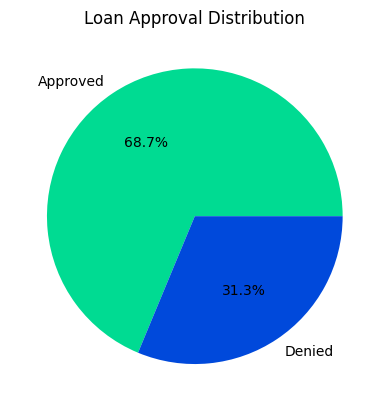

In [9]:
# Visualize the balance of loan approvals to see if we will need to fix any imbalance
plt.pie(df['Loan_Status'].value_counts().values, labels=['Approved', 'Denied'], colors=['#00db92', '#0049db'], autopct='%1.1f%%')
plt.title('Loan Approval Distribution')
plt.show()

In [10]:
# Define a list of categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

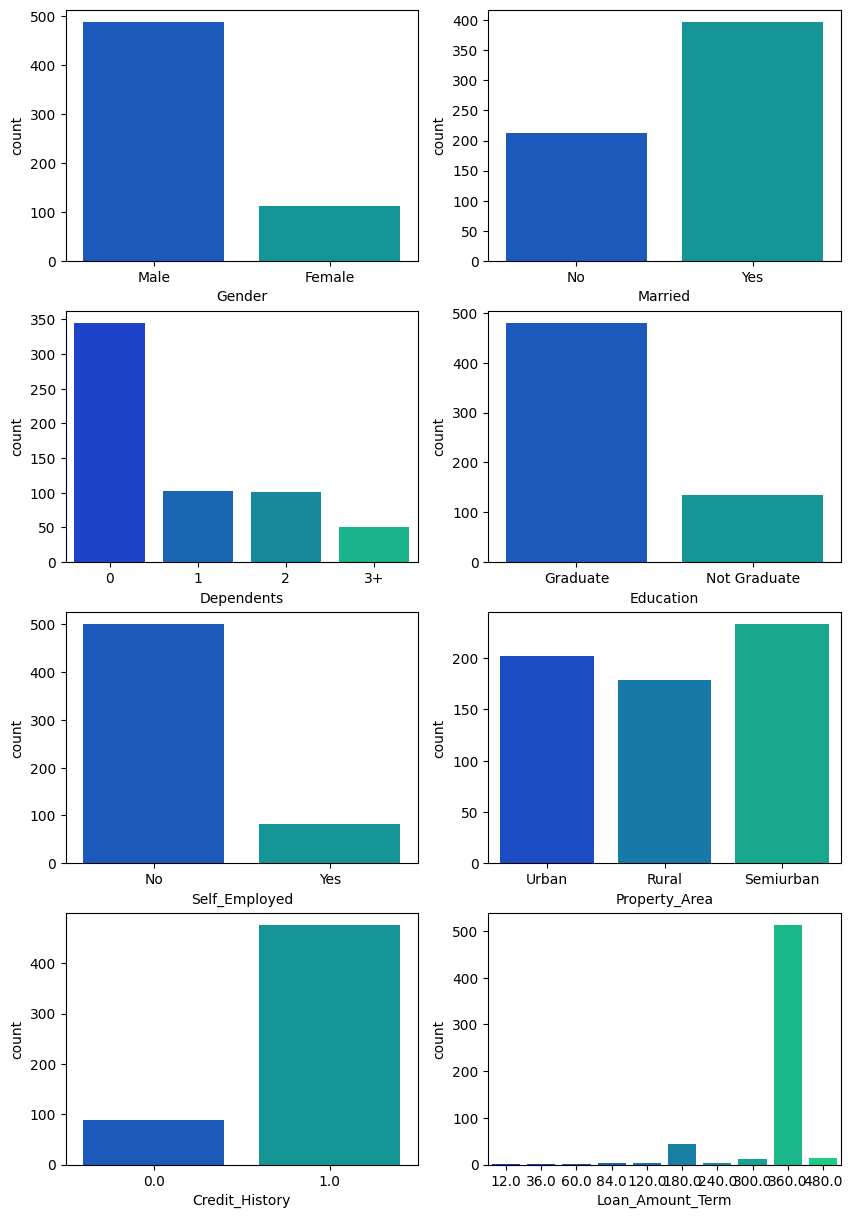

In [11]:
# Visualize the distribution of independent features
plt.figure(figsize=(10,15))

index = 1
for col in categorical_cols[:6]+['Credit_History', 'Loan_Amount_Term']:
    plt.subplot(4,2,index)
    sns.countplot(data=df, x=col, palette='winter')
    index = index + 1
plt.show()

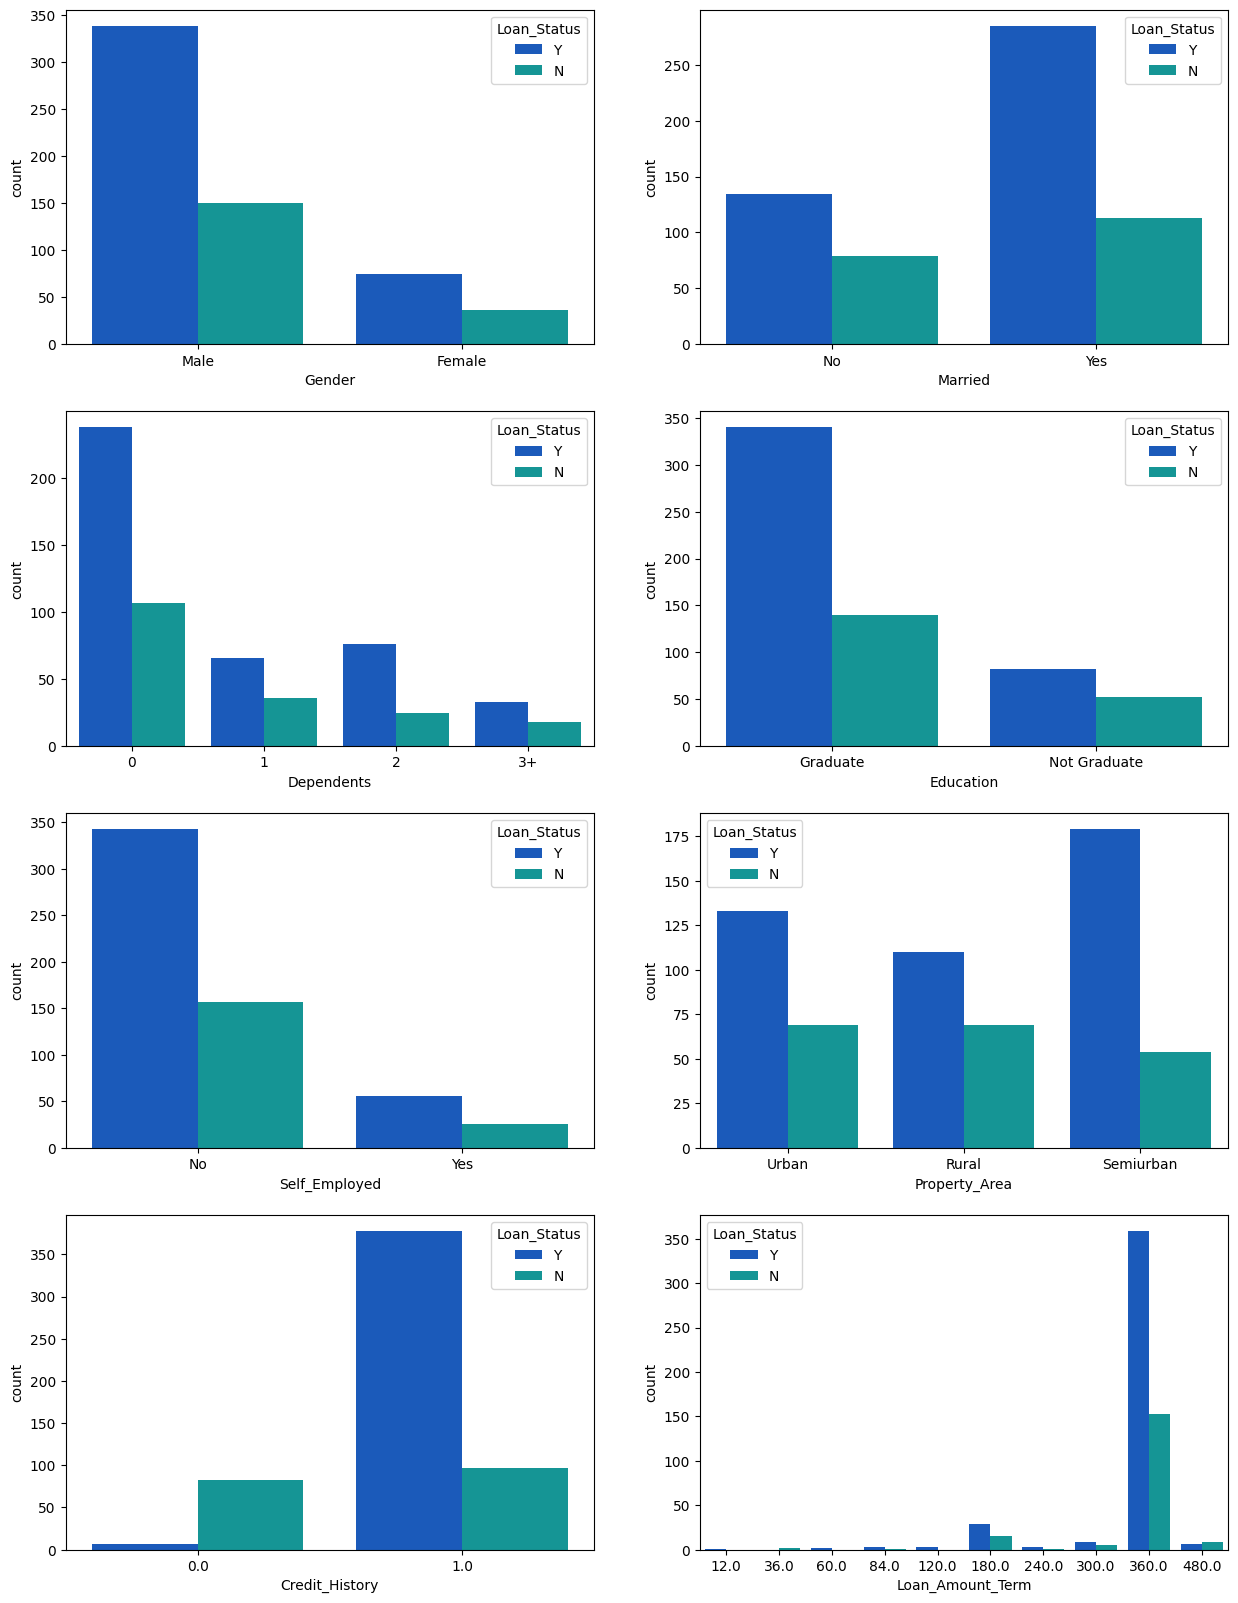

In [12]:
# Visualize the loan approval rates for each independent feature
plt.figure(figsize=(15,20))

index = 1
for col in categorical_cols[:6]+['Credit_History', 'Loan_Amount_Term']:
    plt.subplot(4,2,index)
    sns.countplot(data=df, x=col, hue='Loan_Status', palette='winter')
    index = index + 1
plt.show()

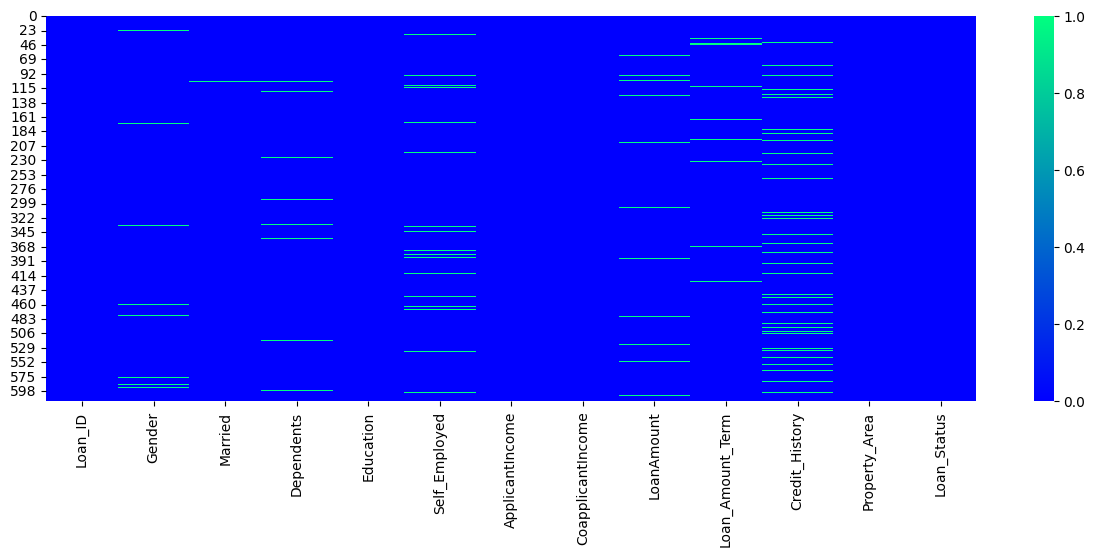

In [13]:
# Visualize a heatmap of the missing values
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cmap='winter')
plt.show()

In [14]:
# Drop the Loan ID as it's not relevant
df = df.drop(['Loan_ID'], axis = 1)

# Remove missing credit history entries from the dataset
df = df[df['Credit_History'].notnull()]

# Loan amount should be filled with the average loan amount
df['LoanAmount'] = df['LoanAmount'].fillna(df.LoanAmount.mean())

# Fill missing data using the most common variable
df['Gender'] = df['Gender'].fillna(df.Gender.mode()[0])
df['Married'] = df['Married'].fillna(df.Married.mode()[0])
df['Dependents'] = df['Dependents'].fillna(df.Dependents.mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df.Self_Employed.mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.mode()[0])

# Check the number of null values per column
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# Print categorical columns that need to be encoded
for col in categorical_cols:
    print(df[col].value_counts(), '\n')

Male      463
Female    101
Name: Gender, dtype: int64 

Yes    365
No     199
Name: Married, dtype: int64 

0     331
2      95
1      90
3+     48
Name: Dependents, dtype: int64 

Graduate        443
Not Graduate    121
Name: Education, dtype: int64 

No     489
Yes     75
Name: Self_Employed, dtype: int64 

Semiurban    217
Urban        182
Rural        165
Name: Property_Area, dtype: int64 

Y    385
N    179
Name: Loan_Status, dtype: int64 



In [16]:
# Label encoding, where categorical columns are encoded to be numerical.
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(df[col].value_counts(), "\n")

1    463
0    101
Name: Gender, dtype: int64 

1    365
0    199
Name: Married, dtype: int64 

0    331
2     95
1     90
3     48
Name: Dependents, dtype: int64 

0    443
1    121
Name: Education, dtype: int64 

0    489
1     75
Name: Self_Employed, dtype: int64 

1    217
2    182
0    165
Name: Property_Area, dtype: int64 

1    385
0    179
Name: Loan_Status, dtype: int64 



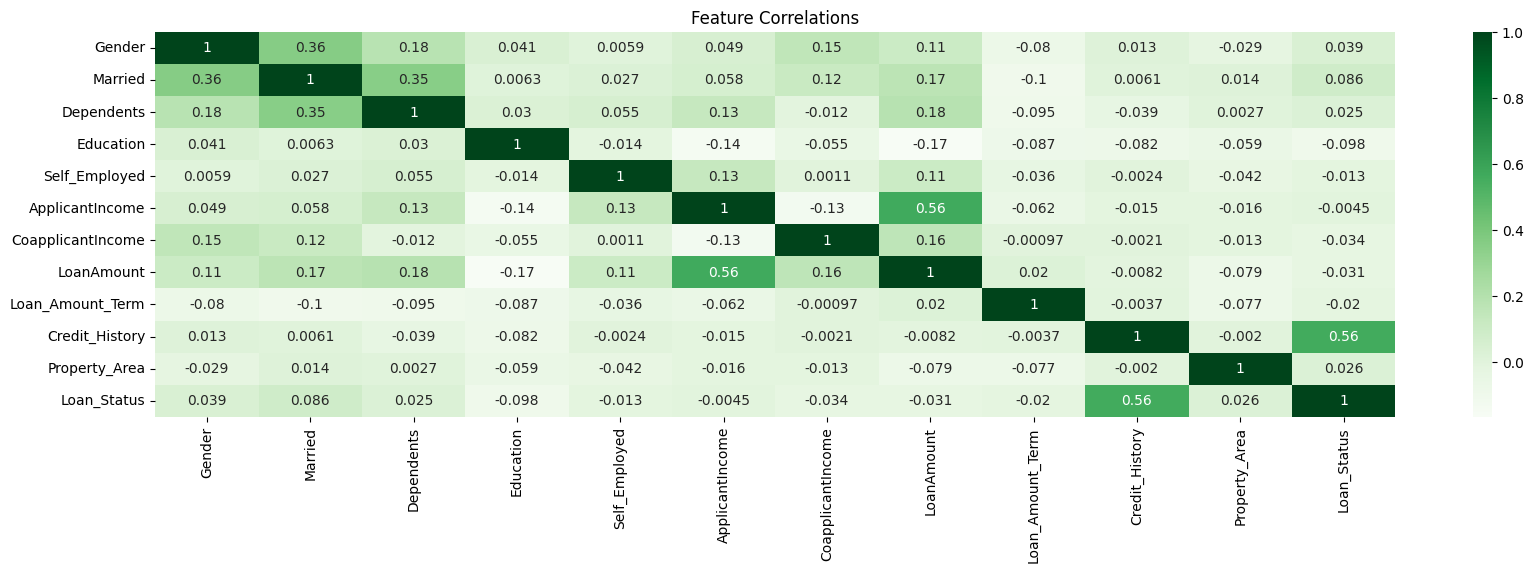

In [17]:
# Visualize feature correlations in a heatmap
plt.subplots(figsize=(20, 5))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.title('Feature Correlations')
plt.show()

In [18]:
# Set up the feature and target datasets
X = df.drop(['Loan_Status'], axis=1).values
y = df['Loan_Status'].values

X

array([[  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

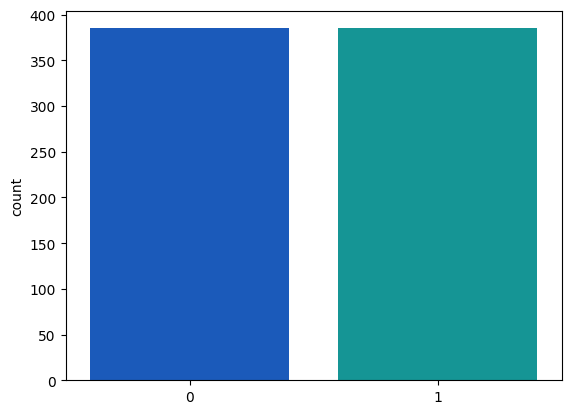

In [19]:
# Balance the data by oversampling. SMOTE had lesser results
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

# Visualize the new balance
sns.countplot(x=y, palette='winter')
plt.show()

In [20]:
# Split the data into two sets: training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Normalize the data with scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(577, 11) (193, 11) (577,) (193,)


In [21]:
def fit_and_eval(model):
    '''
    Fit and evaluate model performance using the training and testing datasets.
    Returns the trained model and accuracy
    '''

    # Fit the model with the training datasets
    model.fit(X_train, y_train)

    # Predict labels for X_test samples
    y_pred = model.predict(X_test)

    # Capture model metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)

    # Capture cross validation score unless the model is GridSearchCV, as it performs cross-validation
    if model.__class__.__name__ != 'GridSearchCV':
        cv_score = cross_val_score(model, X, y, cv=5)
        mean_cv_score = cv_score.mean()

    # Output model metrics
    print('Metrics for {}:'.format(model.__class__.__name__))
    print('Accuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('F1 Score: {}'.format(f1))
    print('ROC AUC Score: {}'.format(roc_score))

    # Skip over cross validation for GridSearchCV as it is automatically performed
    if model.__class__.__name__ != 'GridSearchCV':
        print('Mean CV Accuracy: {}'.format(mean_cv_score))

    # Output the classification report
    print('\nClassification Report:\n', classification_report(y_test, y_pred))

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix in a heatmap
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='winter', cbar=False)
    plt.title('Confusion Matrix Heatmap for {}'.format(model.__class__.__name__))
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()

    # Transform the accuracy to a percentage for output
    accuracy = round((accuracy * 100), 2)

    return model, accuracy

Metrics for LogisticRegression:
Accuracy: 0.7098445595854922
Precision: 0.68
Recall: 0.8415841584158416
F1 Score: 0.752212389380531
ROC AUC Score: 0.7034007748600947
Mean CV Accuracy: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.57      0.65        92
           1       0.68      0.84      0.75       101

    accuracy                           0.71       193
   macro avg       0.72      0.70      0.70       193
weighted avg       0.72      0.71      0.70       193



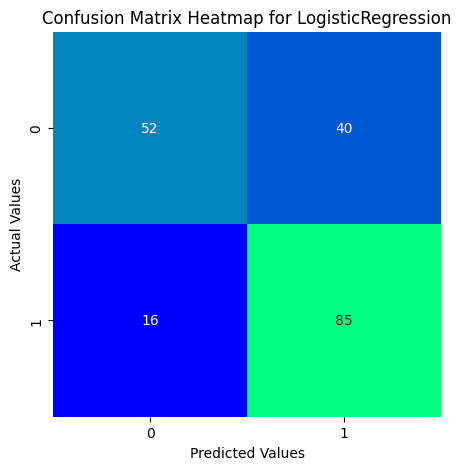


Metrics for RandomForestClassifier:
Accuracy: 0.8341968911917098
Precision: 0.8349514563106796
Recall: 0.8514851485148515
F1 Score: 0.8431372549019608
ROC AUC Score: 0.8333512699095997
Mean CV Accuracy: 0.9025974025974026

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82        92
           1       0.83      0.85      0.84       101

    accuracy                           0.83       193
   macro avg       0.83      0.83      0.83       193
weighted avg       0.83      0.83      0.83       193



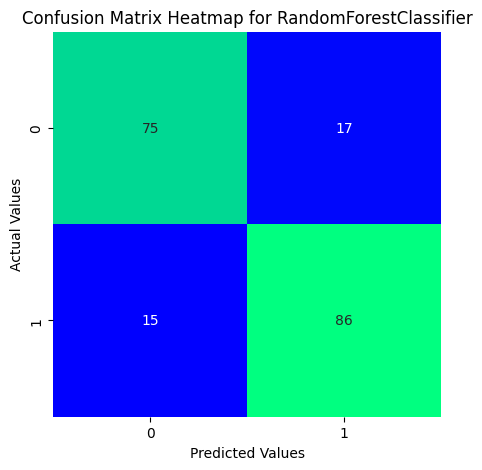


Metrics for SVC:
Accuracy: 0.7461139896373057
Precision: 0.7203389830508474
Recall: 0.8415841584158416
F1 Score: 0.776255707762557
ROC AUC Score: 0.7414442531209642
Mean CV Accuracy: 0.5103896103896104

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71        92
           1       0.72      0.84      0.78       101

    accuracy                           0.75       193
   macro avg       0.75      0.74      0.74       193
weighted avg       0.75      0.75      0.74       193



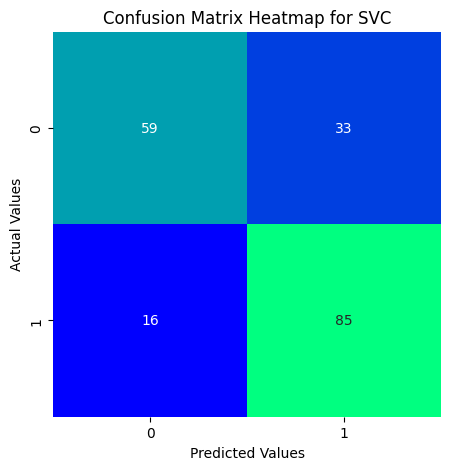

In [22]:
# Define the algorithms that are to be evaluated
algorithms = {
    'lr':  LogisticRegression(random_state=0, max_iter=500),
    'rfc': RandomForestClassifier(random_state=0),
    'svc': SVC(random_state=0, kernel='rbf')
}

# Define dictionaries for classifiers and accuracies
clfs = {}
accuracies = {}

for algo in algorithms:
    # Fit and evaluate classifiers and accuracies
    clfs[algo], accuracies[algo] = fit_and_eval(algorithms[algo])

    # Adds a space between algorithm outputs
    if algo != 'svc':
        print()

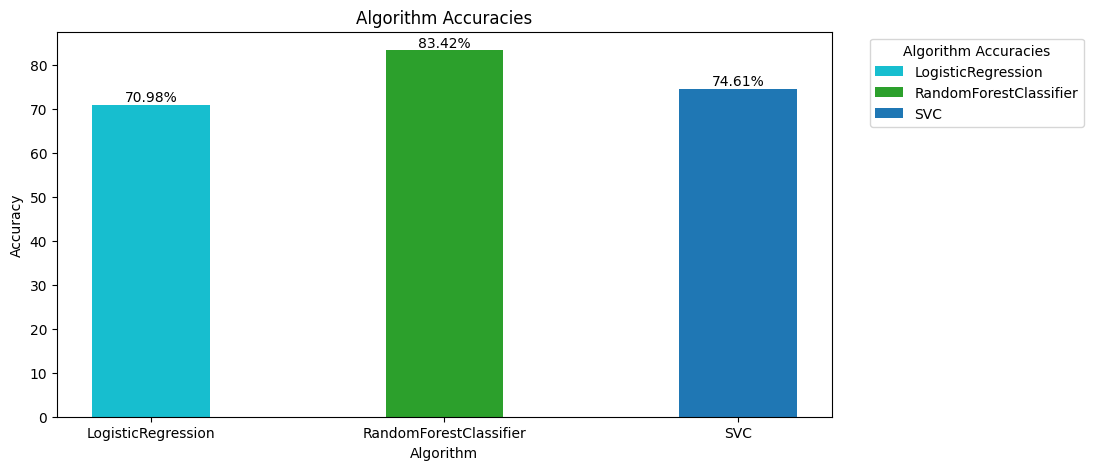

In [23]:
# Initialize the labels and values for the comparison graph
labels = [clf.__class__.__name__ for clf in clfs.values()]
values = accuracies.values()

# Set styling variables
label_colors = ['cyan', 'green', 'blue']
bar_colors = ['tab:cyan', 'tab:green', 'tab:blue']

# Define figure and axes objects
fig, ax = plt.subplots(figsize=(10, 5))

# Create a list of bar plots for the graph
bars = ax.bar(labels, values, label=label_colors, color=bar_colors, width=0.4)

# Style the graph
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Algorithm Accuracies')
ax.legend(title='Algorithm Accuracies', labels=labels, bbox_to_anchor=(1.04, 1), loc='upper left')

# Iterate over the bars to add percentages above them
for bar in bars:
    pos_x = bar.get_x() + bar.get_width() / 2.0
    pos_y = bar.get_height()
    str = f'{pos_y:.2f}%'
    plt.text(pos_x, pos_y, str, ha='center', va='bottom')

# Display the bar graph
plt.show()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Metrics for GridSearchCV:
Accuracy: 0.8341968911917098
Precision: 0.8165137614678899
Recall: 0.8811881188118812
F1 Score: 0.8476190476190476
ROC AUC Score: 0.8318984072320276

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        92
           1       0.82      0.88      0.85       101

    accuracy                           0.83       193
   macro avg       0.84      0.83      0.83       193
weighted avg       0.84      0.83      0.83       193



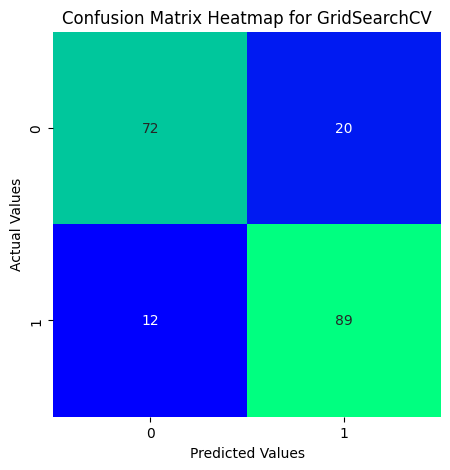

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}
0.8613493253373313


In [24]:
# Grid search can be very resource intensive when a lot of params are evaluated, so a limited number of params were specified.

# Define a dictionary of hyperparameters for the grid search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 5, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [10, 25, 50, 100, 500]
}

# Define a default Random Forest model
estimator = RandomForestClassifier(random_state=0)

# Define the GridSearchCV model
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, verbose=True)

# Fit and evaluate the grid search model
clf = fit_and_eval(grid_search)[0]

# Output the best parameters and score found
print(grid_search.best_params_)
print(grid_search.best_score_)

Metrics for RandomForestClassifier:
Accuracy: 0.8341968911917098
Precision: 0.8165137614678899
Recall: 0.8811881188118812
F1 Score: 0.8476190476190476
ROC AUC Score: 0.8318984072320276
Mean CV Accuracy: 0.8675324675324674

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        92
           1       0.82      0.88      0.85       101

    accuracy                           0.83       193
   macro avg       0.84      0.83      0.83       193
weighted avg       0.84      0.83      0.83       193



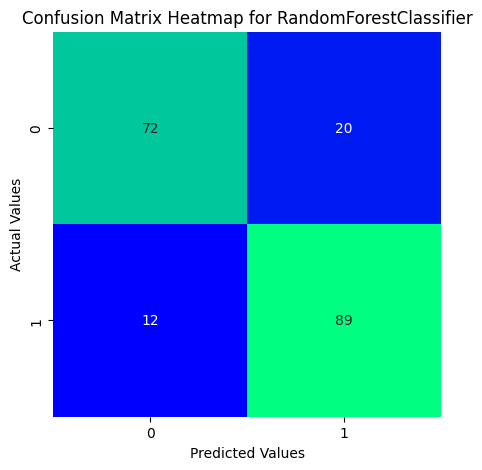

In [25]:
# Create a new Random Forest model with the fine-tuned hyperparameters
rfc = RandomForestClassifier(random_state=0, criterion='gini', max_depth=10, max_features='sqrt', n_estimators=500)

# Fit and evaluate the Random Forest model
clf = fit_and_eval(rfc)[0]

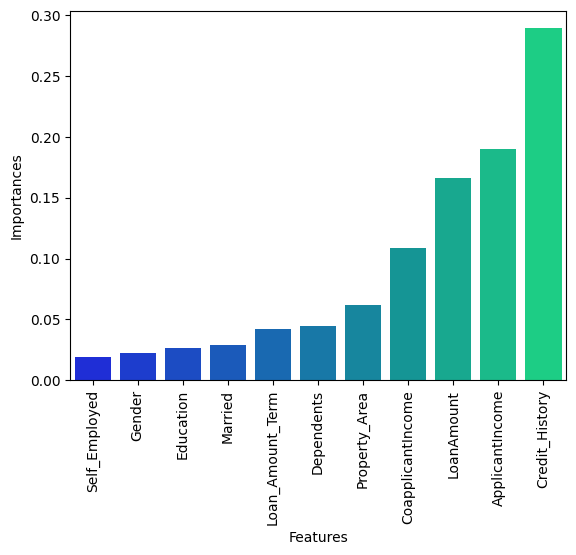

In [26]:
# Initialize the feature scores for the RFC model in a Pandas Series
feature_scores = pd.Series(clf.feature_importances_, index=df.columns[:11]).sort_values()

# Initialize the labels and values from the feature_scores Series
labels = feature_scores.index
values = feature_scores.values

# Visualize feature importances for the Random Forest Classifier model
sns.barplot(x=labels, y=values, palette='winter')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.xticks(rotation='vertical') # rotate the tick labels on the x-axis
plt.show()

In [27]:
def validate_input(str, valid_inputs):
    '''
    Utility function to apply validation to user inputs in the interactive UI.

    str: The string for the user prompt

    valid_inputs:
        0 for numeric inputs 0 or above
        list for specified inputs

    Returns the validated user input
    '''
    user_input = input(str).lower()

    # Validate inputs where valid_inputs are a list of inputs
    if isinstance(valid_inputs, list):
        while user_input not in valid_inputs:
            print('Invalid response. Please try again.')
            user_input = input(str).lower()
    else: # Validate numeric inputs
        while not user_input.isnumeric() or int(user_input) < 0:
            print('Invalid response. Please try again.')
            user_input = input(str).lower()

    return user_input

In [ ]:
# Collect user inputs
gender = validate_input('What is your gender? (M/F): ', ['m', 'f'])
married = validate_input('Are you married? (Y/N): ', ['y', 'n'])
dependents = validate_input('How many dependents do you have?: ', 0)
education = validate_input('Have you graduated high school? (Y/N): ', ['y', 'n'])
self_employed = validate_input('Are you self-employed? (Y/N): ', ['y', 'n'])
applicant_income = validate_input('What is your annual income?: ', 0)
co_applicant_income = validate_input('What is your co-applicant\'s annual income? (0 if N/A): ', 0)
loan_amount = validate_input('What is your desired loan amount? (e.g.: 150000): ', 0)
loan_terms = validate_input('What loan term (in months) are you requesting? (180 or 360): ', ['180', '360'])
credit_history = validate_input('Do you have a history of good credit? (Y/N): ', ['y', 'n'])
property_area = validate_input('What area is the property located in? (rural, semirural, urban): ', ['rural', 'semirural', 'urban'])

# Map categorical inputs to numerical values
gender = 0 if gender == 'f' else 1
married = 0 if married == 'n' else 1
education = 0 if education == 'n' else 1
self_employed = 0 if self_employed == 'n' else 1
credit_history = 0 if credit_history == 'n' else 1
property_area = 0 if property_area == 'rural' else 1 if property_area == 'semirural' else 2

# Change types of integer inputs collected as strings
dependents = int(dependents)
applicant_income = int(applicant_income)
co_applicant_income = int(co_applicant_income)
loan_amount = int(loan_amount)
loan_terms = int(loan_terms)

# Organize inputs into a list
user_inputs = [
    gender, married, dependents, education, self_employed, applicant_income,
    co_applicant_income, loan_amount, loan_terms, credit_history, property_area
]

# Reshape and scale the input data
user_inputs = np.array(user_inputs).reshape(1, -1)
user_inputs_scaled = scaler.transform(user_inputs)

# Make a prediction on the scaled input data
prediction = clf.predict(user_inputs_scaled)
prediction_prob = clf.predict_proba(user_inputs_scaled)
prediction_prob_percent = round(prediction_prob[0][1] * 100, 2)

eligibility = 'Eligible' if prediction == 1 else 'NOT Eligibile'

# Output the eligibility determination
print('\nLoan Eligibility Determination: {} ({}%)'.format(eligibility, prediction_prob_percent))